In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análise Fatorial por Componentes Principais

Exemplo da aula do MBA DSA USP/ESALQ com Prof. Wilson Tarantin Jr.

Fonte: Fávero e Belfiore, MANUAL DE ANÁLISE DE DADOS, Capítulo 10

- Referência: https://www.datacamp.com/tutorial/introduction-factor-analysis

- Documentação: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html


### Aplicabilidade

Objetivo de agrupar as variáveis do dataset. <br>

É aplicada quando as variáveis forem métrica, pois depende da matriz de correlação de pearson.

### Objetivo da Análise

Verificar se os fatores extraídos por ano podem ser utilizados sem atualização, ou seja, verificar se os indicadores gerados por meio das variáveis podem ser utilizado ao longo dos anos ou devem ser atualizados ano a ano.

Ao final, iremos comparar se os fatores do ano 1 são iguais aos fatores do ano 2.




In [2]:
#Importa a base
indicadores_paises = pd.read_excel(r'bases\indicador_país.xlsx')
indicadores_paises.head()

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2
0,Argentina,2.9,5.8836,10749.3193,9.7,2.9,5.2538,11601.6299,9.8
1,Australia,8.7,0.7800,25190.8398,11.8,8.7,0.7800,25306.8242,11.9
2,Austria,7.9,0.7077,26642.9941,11.8,7.9,0.8094,27266.4043,11.8
3,Belgium,7.1,1.6349,24550.3965,12.0,7.1,1.3524,24733.6270,12.1
4,Brazil,3.7,25.0808,4716.6143,6.7,3.7,24.4085,4803.3984,6.8


## Análise Descritiva

Comparando as médias dos indicadores entre os anos 1 e 2, já vemos que existem algumas diferenças.

In [3]:
#Análise descritiva
indicadores_paises.describe()

,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,5.518000,7.092374,15091.204106,10.25800,5.500000,6.645060,15294.015810,10.350000
std,2.374154,13.207847,12281.213696,2.34626,2.361079,12.592332,12371.638318,2.332228
min,1.900000,0.459600,794.801300,6.10000,2.000000,0.435000,837.746400,6.200000
25%,3.525000,0.897225,3994.237550,8.20000,3.500000,0.902000,4069.669950,8.300000
50%,4.950000,1.616700,11546.507800,10.60000,5.000000,1.656200,11651.563000,10.650000
75%,7.700000,6.450225,25362.916500,12.27500,7.750000,6.134375,25776.672875,12.375000
max,9.400000,70.847500,39971.789100,14.10000,9.300000,70.847500,40034.851600,14.200000


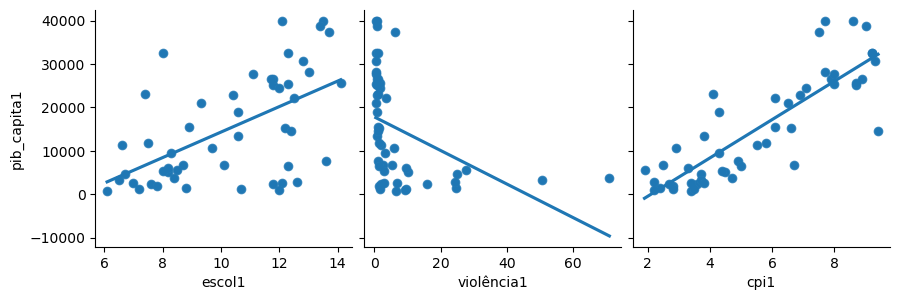

In [4]:
#Plotando gráfico 
#https://datavizpyr.com/how-to-make-scatter-plot-with-regression-line-using-seaborn-in-python/
#https://seaborn.pydata.org/generated/seaborn.regplot.html

g = sns.pairplot(data=indicadores_paises, 
                 y_vars='pib_capita1', 
                 x_vars=['escol1', 'violência1', 'cpi1'], 
                 height=3)
g.map(sns.regplot, fit_reg=True, ci=None)
#g.set(ylim=(-1,11), yticks=[0, 5, 10])
plt.show()

# Aplicando Análise Fatorial PCA do Ano 1

### Matriz de Correlação

In [5]:
#Verifica correlação Ano 1
variaveis_ano1 = indicadores_paises.iloc[:,1:5]

matriz_corr = variaveis_ano1.corr()
matriz_corr

,cpi1,violência1,pib_capita1,escol1
cpi1,1.000000,-0.391963,0.853645,0.544746
violência1,-0.391963,1.000000,-0.415796,-0.323574
pib_capita1,0.853645,-0.415796,1.000000,0.560814
escol1,0.544746,-0.323574,0.560814,1.000000


### Matriz de Significância

Matriz com p-valores do coeficiente de correlação. <br> Avaliar a significância individual de cada coeficiente de correlação dos pares de variáveis.

**p-valor < 0,05 indica que o coeficiente de correlação é estatisticamente relevante**

Todas as variáveis possuem coeficientes de correlação significantes.

In [6]:
from matrixSig import matrixSig

matrixSig(matriz_corr, variaveis_ano1)

,cpi1,violência1,pib_capita1,escol1
cpi1,NA,0.00488,0.0,0.00004
violência1,0.00488,NA,0.00267,0.02189
pib_capita1,0.0,0.00267,NA,0.00002
escol1,0.00004,0.02189,0.00002,NA


### Mapa de Calor das Correlações

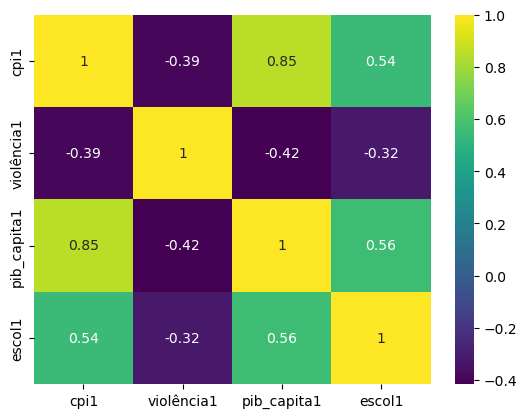

In [7]:
#Gráfico matriz correlação

sns.heatmap(matriz_corr, cmap='viridis', annot=True)
plt.show()

### Teste de Esfericidade de Barlett

Avalia se a aplicação da análise fatorial é adequada ou não.<br>
O teste verifica se os coeficientes de correlação são estatisticamente diferentes de zero.

p-valor < 0,05: rejeita H0

>H0: A Matriz de Correlação é igual à Matriz Identidade.

>H1: A Matriz de Correlação não é igual à Matriz Identidade.

onde,

Matriz Indentidade:
<img src='img\matriz_id.png' style="width: 200px;">


Não queremos que as correlações sejam iguais a zero, pois assim não existiria nenhuma correlação entre as variáveis e consequentemente não seria possível criar fatores.

In [8]:
#https://www.datacamp.com/tutorial/introduction-factor-analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


# Calcula p-valor para avaliar se rejeita H0
chi_square_value, p_value=calculate_bartlett_sphericity(variaveis_ano1)
print()

print(f'ChiSq: {chi_square_value:.4f}, p-value: {p_value:.4f}')


ChiSq: 89.6366, p-value: 0.0000


## Elaboração da Análise Fatorial por Componentes Principais - Ano 1

In [9]:
#https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#module-factor_analyzer.factor_analyzer
from factor_analyzer import FactorAnalyzer

fa_ano1 = FactorAnalyzer()
fa_ano1.set_params(n_factors=len(variaveis_ano1.columns), method='principal', rotation=None)
fa_ano1.fit(variaveis_ano1)

FactorAnalyzer(method='principal', n_factors=4, rotation=None,
               rotation_kwargs={})

### Fatores

In [11]:
# Gerando os Fatores
fatores_preditos_ano1 = pd.DataFrame(fa_ano1.transform(variaveis_ano1))
fatores_preditos_ano1.columns = [f"Fator {i+1}" for i, v in enumerate(fatores_preditos_ano1.columns)]
fatores_preditos_ano1.head()

,Fator 1,Fator 2,Fator 3,Fator 4
0,-0.561206,-0.544004,0.498548,1.361449
1,1.071493,0.216772,-0.320501,-0.964103
2,0.996483,0.148294,-0.195406,-0.120197
3,0.825835,0.121005,0.164279,0.175029
4,-1.342877,0.643270,-1.054252,-0.034184


### Eigenvalues ( Autovalores)

O primeiro Autovalor é sempre o maior valor e que gera o fator principal.


Os Autovalores apresentam a proporção da variância que foi compartilhada pelas variáveis originais na formação daquele fator.

64,7% da variância das variáveis originais já estão representadas no primeiro fator. <br>
Sendo o primeiro fator o único a ter autovalor maior do que 1, ou seja, utilizando o critério de kaiser, escolheremos apenas um fator para representar todas as variáveis originais.

In [12]:
ev, v = fa_ano1.get_eigenvalues()

# Cria tabela de autovalores com respectivas variâncias e variâncias acumuladas
tabela_eigen_ano1 = pd.DataFrame(fa_ano1.get_factor_variance()).round(3)
tabela_eigen_ano1.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen_ano1.columns)]
tabela_eigen_ano1.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen_ano1

,Fator 1,Fator 2,Fator 3,Fator 4
Autovalor,2.589,0.730,0.536,0.146
Variância,0.647,0.182,0.134,0.036
Variância Acumulada,0.647,0.830,0.964,1.000


### Scores Fatoriais

Elementos que relacionam a variável em z-score com o fator. <br>
É o peso para cada z-score de cada variável para calcular os fatores.

Fórmula:  Autovalor/ raiz(Autovetor)

No exemplo temos o Fator 1 com maior peso no PIB_CAPITA, CPI e ESCOL. Quanto maior, melhor o país.<br>
E score (peso) negativo em violência. Quanto menor pior o país. <br>


In [13]:
# Identificando os scores fatoriais

scores = fa_ano1.weights_

tabela_scores_ano1 = pd.DataFrame(scores)
tabela_scores_ano1.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores_ano1.columns)]
tabela_scores_ano1.index = variaveis_ano1.columns
tabela_scores_ano1

,Fator 1,Fator 2,Fator 3,Fator 4
cpi1,0.347735,0.263411,-0.535812,-1.819669
violência1,-0.237343,1.079356,-0.078310,0.061626
pib_capita1,0.351970,0.227309,-0.483238,1.882605
escol1,0.291817,0.289819,1.157643,-0.052200


In [14]:
fatores_preditos_ano1.corr().round()

,Fator 1,Fator 2,Fator 3,Fator 4
Fator 1,1.0,0.0,-0.0,-0.0
Fator 2,0.0,1.0,0.0,-0.0
Fator 3,-0.0,0.0,1.0,-0.0
Fator 4,-0.0,-0.0,-0.0,1.0


### Cargas Fatoriais

In [15]:
# Cargas Fatoriais

cargas_fatoriais_ano1 = pd.DataFrame(fa_ano1.loadings_)
cargas_fatoriais_ano1.rename(columns = lambda x: 'Fator ' + str(x + 1), inplace=True)
cargas_fatoriais_ano1.index = variaveis_ano1.columns
cargas_fatoriais_ano1.round(3)

,Fator 1,Fator 2,Fator 3,Fator 4
cpi1,0.900,0.192,-0.287,-0.265
violência1,-0.614,0.788,-0.042,0.009
pib_capita1,0.911,0.166,-0.259,0.274
escol1,0.755,0.212,0.620,-0.008


### Comunalidades

In [16]:
# Calculando comunalidades
communalities = fa_ano1.get_communalities()
communalities = pd.DataFrame(communalities, index=variaveis_ano1.T.index, columns=['communalities'])
communalities.sort_values(by=['communalities'], ascending=False).head(8)

,communalities
pib_capita1,1.0
cpi1,1.0
violência1,1.0
escol1,1.0


# Critério de Kaiser

Seleciona os fatores derivados de autovalores maiores que 1, ou seja, fatores que têm percentual maior de variância das variáveis originais.

Esse critério tem como base o raciocínio de que autovalores representam a quantidade de variação explicada por um fator e que um autovalor de 1 representa uma quantidade substancial de variação. (https://repositorio.enap.gov.br/bitstream/1/4790/1/Livro%20An%C3%A1lise%20Fatorial.pdf)

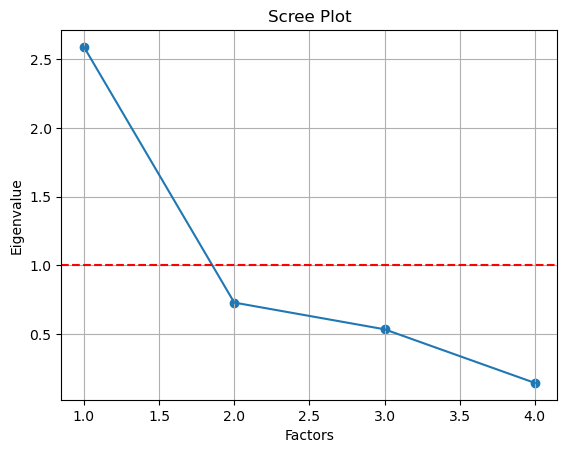

In [17]:
#https://www.kaggle.com/code/caesarlupum/factor-analysis-segmentation-analysis/notebook
plt.scatter(range(1,variaveis_ano1.shape[1]+1),ev)
plt.plot(range(1,variaveis_ano1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

In [18]:
# Definindo a quantidade de Fatores > 1
k = len(list(filter(lambda x: x>1, tabela_eigen_ano1.T['Autovalor'])))
k

1

### Aplicando o Método Utilizando 1 Fatores - Ano 1

In [19]:
fa2_ano1 = FactorAnalyzer(n_factors=k, method='principal', rotation=None)
fa2_ano1.fit(variaveis_ano1)

FactorAnalyzer(method='principal', n_factors=1, rotation=None,
               rotation_kwargs={})

### Fatores

**Aplicado multiplicação por -1 para corrigir os sinais**

In [20]:
# Gerando os Fatores
fatores_preditos_ano1 = pd.DataFrame(fa2_ano1.transform(variaveis_ano1))*-1
fatores_preditos_ano1.columns = [f"Fator {i+1}" for i in range(k)]
fatores_preditos_ano1.head()

,Fator 1
0,-0.561206
1,1.071493
2,0.996483
3,0.825835
4,-1.342877


### Scores Fatoriais

**Aplicado multiplicação por -1 para corrigir os sinais**

In [21]:
# Identificando os scores fatoriais

scores = fa2_ano1.weights_*-1

tabela_scores_ano1 = pd.DataFrame(scores)
tabela_scores_ano1.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores_ano1.columns)]
tabela_scores_ano1.index = variaveis_ano1.columns
tabela_scores_ano1

,Fator 1
cpi1,0.347735
violência1,-0.237343
pib_capita1,0.351970
escol1,0.291817


### Cargas Fatoriais

São as correlações de pearson entre o fator e a variável original.<br>
Temos a mesma conclusão dos scores fatoriais (pesos).

Aqui o algoritimo inveteu os valores quando aplicamos 1 fator. <br>Os sinais deveriam ser os mesmo da tabela Scores Fatoriais mais acima.

**Apliquei a multiplicação por -1 para corrigir os sinais.**

In [22]:
# Cargas Fatoriais

cargas_fatoriais_ano1 = pd.DataFrame(fa2_ano1.loadings_)*-1
cargas_fatoriais_ano1.rename(columns = lambda x: 'Fator ' + str(x + 1), inplace=True)
cargas_fatoriais_ano1.index = variaveis_ano1.columns
cargas_fatoriais_ano1.round(3)

,Fator 1
cpi1,0.900
violência1,-0.614
pib_capita1,0.911
escol1,0.755


## Comunalidades

São o percentual das variâncias por variável que restaram após a aplicação do critério da raiz latente.

Tivemos poucas perdas:

- PIB per Capita
- CPI

Média Perdas:

- escolaridade

Pouco mais de Perdas:

- Violência

In [23]:
# Calculando comunalidades
communalities = fa2_ano1.get_communalities()
communalities = pd.DataFrame(communalities, index=variaveis_ano1.T.index, columns=['communalities'])
communalities.sort_values(by=['communalities'], ascending=False).head(8).round(3)

,communalities
pib_capita1,0.830
cpi1,0.810
escol1,0.571
violência1,0.378


### Incluindo Fatores do Ano1 na Tabela Original

In [24]:
indicadores_paises['Fator_Ano1'] = fatores_preditos_ano1
indicadores_paises.head()

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2,Fator_Ano1
0,Argentina,2.9,5.8836,10749.3193,9.7,2.9,5.2538,11601.6299,9.8,-0.561206
1,Australia,8.7,0.7800,25190.8398,11.8,8.7,0.7800,25306.8242,11.9,1.071493
2,Austria,7.9,0.7077,26642.9941,11.8,7.9,0.8094,27266.4043,11.8,0.996483
3,Belgium,7.1,1.6349,24550.3965,12.0,7.1,1.3524,24733.6270,12.1,0.825835
4,Brazil,3.7,25.0808,4716.6143,6.7,3.7,24.4085,4803.3984,6.8,-1.342877


# Aplicando Análise Fatorial PCA do Ano 2

### Teste de Esfericidade de Barlett

In [25]:
#Selecionando variáveis do ano 2
variaveis_ano2 = indicadores_paises.iloc[:,5:9]
variaveis_ano2.head()

,cpi2,violência2,pib_capita2,escol2
0,2.9,5.2538,11601.6299,9.8
1,8.7,0.7800,25306.8242,11.9
2,7.9,0.8094,27266.4043,11.8
3,7.1,1.3524,24733.6270,12.1
4,3.7,24.4085,4803.3984,6.8


In [26]:
# Calcula p-valor para avaliar se rejeita H0
chi_square_value, p_value=calculate_bartlett_sphericity(variaveis_ano2)
print()

print(f'ChiSq: {chi_square_value:.4f}, p-value: {p_value:.4f}')


ChiSq: 86.4832, p-value: 0.0000


## Elaboração da Análise Fatorial por Componentes Principais - Ano 2

In [27]:
fa_ano2 = FactorAnalyzer(n_factors=len(variaveis_ano2.columns), method='principal', rotation=None)
fa_ano2.fit(variaveis_ano2)

FactorAnalyzer(method='principal', n_factors=4, rotation=None,
               rotation_kwargs={})

### Eigenvalues

In [28]:
ev, v = fa_ano2.get_eigenvalues()

# Cria tabela de autovalores com respectivas variâncias e variâncias acumuladas
tabela_eigen_ano2 = pd.DataFrame(fa_ano2.get_factor_variance()).round(3)
tabela_eigen_ano2.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen_ano2.columns)]
tabela_eigen_ano2.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen_ano2

,Fator 1,Fator 2,Fator 3,Fator 4
Autovalor,2.566,0.737,0.543,0.154
Variância,0.641,0.184,0.136,0.038
Variância Acumulada,0.641,0.826,0.962,1.000


### Critério de Kaizer

In [29]:
# Definindo a quantidade de Fatores > 1
k = len(list(filter(lambda x: x>1, tabela_eigen_ano2.T['Autovalor'])))

# Setando parâmetros
fa2_ano2 = FactorAnalyzer(n_factors=k, method='principal', rotation=None)
fa2_ano2.fit(variaveis_ano2)

FactorAnalyzer(method='principal', n_factors=1, rotation=None,
               rotation_kwargs={})

### Fatores

**Aplicado multiplicação por -1 para corrigir os sinais**

In [30]:
# Gerando os Fatores
fatores_preditos_ano2 = pd.DataFrame(fa2_ano2.transform(variaveis_ano1))*-1
fatores_preditos_ano2.columns = [f"Fator {i+1}" for i in range(k)]
fatores_preditos_ano2.head()

,Fator 1
0,-0.588861
1,1.060819
2,0.984260
3,0.811578
4,-1.388386


### Scores Fatoriais

**Aplicado multiplicação por -1 para corrigir os sinais**

In [31]:
# Identificando os scores fatoriais

scores = fa2_ano2.weights_*-1

tabela_scores_ano2 = pd.DataFrame(scores)
tabela_scores_ano2.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores_ano2.columns)]
tabela_scores_ano2.index = variaveis_ano2.columns
tabela_scores_ano2

,Fator 1
cpi2,0.350314
violência2,-0.237098
pib_capita2,0.353946
escol2,0.292410


### Cargas Fatoriais

**Aplicado multiplicação por -1 para corrigir os sinais**

Comparando as cargas fatoriais entre o ano 1 e o ano dois, verifica-se que existe uma ligeira diferença entre eles. Comprovando de fato que os indicadores mudam de um ano para o outro.

A mesma análise pode ser feita utilizando os Scores (pesos). Porém o algoritimo retornou nulo no ano2.

In [32]:
# Cargas Fatoriais

cargas_fatoriais_ano2 = pd.DataFrame(fa2_ano2.loadings_)*-1
cargas_fatoriais_ano2.rename(columns = lambda x: 'Fator ' + str(x + 1), inplace=True)
cargas_fatoriais_ano2.index = variaveis_ano2.columns
cargas_fatoriais_ano2.round(3)

,Fator 1
cpi2,0.899
violência2,-0.608
pib_capita2,0.908
escol2,0.750


### Incluindo Fatores na Base

In [33]:
indicadores_paises['Fator_Ano2'] = fatores_preditos_ano2
indicadores_paises.head(10)

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2,Fator_Ano1,Fator_Ano2
0,Argentina,2.9,5.8836,10749.3193,9.7,2.9,5.2538,11601.6299,9.8,-0.561206,-0.588861
1,Australia,8.7,0.7800,25190.8398,11.8,8.7,0.7800,25306.8242,11.9,1.071493,1.060819
2,Austria,7.9,0.7077,26642.9941,11.8,7.9,0.8094,27266.4043,11.8,0.996483,0.984260
3,Belgium,7.1,1.6349,24550.3965,12.0,7.1,1.3524,24733.6270,12.1,0.825835,0.811578
4,Brazil,3.7,25.0808,4716.6143,6.7,3.7,24.4085,4803.3984,6.8,-1.342877,-1.388386
5,Canada,8.7,1.6049,25575.2168,14.1,8.9,1.7157,25933.2891,14.2,1.356615,1.347535
6,Chile,6.7,5.2600,6781.6963,10.1,7.2,5.7218,7122.9385,10.2,-0.052270,-0.071473
7,China,3.6,2.0567,2426.3325,7.6,3.5,1.7174,2639.5415,7.7,-0.892963,-0.917661
8,Colombia,3.7,50.4671,3218.0718,6.5,3.5,41.7733,3362.4656,6.6,-1.872207,-1.939869
9,Cyprus,6.6,1.3535,15328.3350,12.2,6.3,1.5967,15378.1670,12.3,0.515113,0.500805


### Comunalidades

In [34]:
# Calculando comunalidades
communalities = fa2_ano2.get_communalities()
communalities = pd.DataFrame(communalities, index=variaveis_ano2.T.index, columns=['communalities'])
communalities.sort_values(by=['communalities'], ascending=False).head(8)

,communalities
pib_capita2,0.824854
cpi2,0.808009
escol2,0.562972
violência2,0.370132


### Comparando Resultados

Os pesos das variáveis mudaram levemente de um ano para o outro, indicando que exitem diferenças nos indicadores de um ano para o outro.

In [35]:
#Comparando Scores
comparativo_scores = pd.DataFrame()
cg_scores_1 = tabela_scores_ano1.reset_index()
cg_scores_2 = tabela_scores_ano2.reset_index()
comparativo_scores['score_ano1'] = cg_scores_1['Fator 1']
comparativo_scores['score_ano2'] = cg_scores_2['Fator 1']
comparativo_scores = comparativo_scores.set_index(tabela_scores_ano1.index).round(3)
comparativo_scores

,score_ano1,score_ano2
cpi1,0.348,0.350
violência1,-0.237,-0.237
pib_capita1,0.352,0.354
escol1,0.292,0.292


In [36]:
#Comparando Cargas
comparativo_cargas = pd.DataFrame()
cg_fator_1 = cargas_fatoriais_ano1.reset_index()
cg_fator_2 = cargas_fatoriais_ano2.reset_index()
comparativo_cargas['carga_ano1'] = cg_fator_1['Fator 1']
comparativo_cargas['carga_ano2'] = cg_fator_2['Fator 1']
comparativo_cargas = comparativo_cargas.set_index(cargas_fatoriais_ano1.index).round(3)
comparativo_cargas

,carga_ano1,carga_ano2
cpi1,0.900,0.899
violência1,-0.614,-0.608
pib_capita1,0.911,0.908
escol1,0.755,0.750


## Ranking dos Ano 1 e Ano 2

## Criando Ranking com Fatores

Ranking baseado no Fator 1 do ano 1 e Fator 1 do ano 2 em ordem decrescente.

In [37]:
indicadores_paises_= indicadores_paises
#Marcando Posição Usando Fator 1
list_pos = []

indicadores_paises_ = indicadores_paises_.sort_values(by=['Fator_Ano1'], ascending=False)

sum=1
for i in range(len(indicadores_paises)):
    list_pos.append(sum)
    sum+=1

indicadores_paises_['pos_ano1'] = list_pos

#Marcando Posição Usando Fator 1
list_pos = []
indicadores_paises_ = indicadores_paises_.sort_values(by=['Fator_Ano2'], ascending=False)

sum=1
for i in range(len(indicadores_paises)):
    list_pos.append(sum)
    sum+=1

indicadores_paises_['pos_ano2'] = list_pos

In [38]:
indicadores_paises_.head(50)

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2,Fator_Ano1,Fator_Ano2,pos_ano1,pos_ano2
42,Switzerland,9.0,0.8976,38826.8438,13.4,8.7,0.9867,39170.4141,13.5,1.709531,1.700267,1,1
29,Norway,8.6,0.8763,39970.2930,13.5,8.6,0.6321,40034.8516,13.6,1.696403,1.686432,2,2
11,Denmark,9.3,0.6282,30667.8242,12.8,9.3,1.0043,30860.1289,12.8,1.447219,1.438568,3,3
41,Sweden,9.2,1.0819,32631.1934,12.3,9.2,0.8965,33630.2461,12.4,1.418209,1.408367,4,4
21,Japan,7.7,0.4763,39971.7891,12.1,7.8,0.4394,39578.0742,12.2,1.394655,1.381883,5,5
48,United States,7.5,6.1731,37329.6172,13.7,7.1,6.4100,37691.0273,13.7,1.386184,1.369838,6,6
5,Canada,8.7,1.6049,25575.2168,14.1,8.9,1.7157,25933.2891,14.2,1.356615,1.347535,7,7
47,United Kingdom,7.7,0.5014,28244.3379,13.0,7.6,0.4350,28272.4063,13.0,1.167762,1.156469,8,8
27,Netherlands,8.9,1.1445,26501.0449,11.7,8.8,1.0776,26634.8594,11.8,1.119834,1.109062,9,9
1,Australia,8.7,0.7800,25190.8398,11.8,8.7,0.7800,25306.8242,11.9,1.071493,1.060819,10,10
